# MVPS.Solutions Project 1: California Hospital Visits due to Air Quality

California's Hospital Visits due to Asthma during the years 2009 and 2012
We will explore how the number of Hospital Visits change over time, and explore whether Air Quality impacts those changes.
Data Sources:
1) Califronia Hospital visits are from Data World: https://data.world/health/asthma-ed-visit-rates-by-zip
2) Air Quality: Center for Disease Control (CDC). Air Quality Measures on the National Environmental Health Tracking Network:
https://data.cdc.gov/Environmental-Health-Toxicology/Air-Quality-Measures-on-the-National-Environmental/cjae-szjv
CDC API link: https://data.cdc.gov/resource/hiea-rbwm.json


In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gmaps

from config import gkey
gmaps.configure(api_key=gkey)
print("All dependencies imported properly.")

All dependencies imported properly.


In [2]:
#open NYS Asthma CSV
ca_csv = "../MVP-Solutions/Asthma_Emergency_Department_Visit_Rates_by_ZIP_Code.csv"

ca_asthma_data= pd.read_csv(ca_csv)
ca_asthma_data_clean = ca_asthma_data
ca_asthma_data

,Year,ZIP code,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES


In [3]:
ca_asthma_data= ca_asthma_data.rename(columns={'County Fips code': 'countyfips', 'ZIP code': 'zip', 'Age Group': 'Age_Group', 
                                               'Number of Visits':"NumVisits", "Age-adjusted rate": "Age_adjusted_rate"})
ca_asthma_data

,Year,zip,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES


In [4]:
ca_asthma_data

,Year,zip,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES


In [5]:
ca_asthma_data[['Zip_Code', 'Coord']] = ca_asthma_data.zip.apply(lambda x: pd.Series(str(x).split('\n')))
ca_asthma_data               

,Year,zip,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Coord
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)"
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)"
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)"
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)"
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)"
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)"
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)"
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)"
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)"
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES,90004,"(34.07572239300049, -118.30301712299968)"


In [6]:
ca_asthma_data[['Lat', 'Lng']] = ca_asthma_data.Coord.apply(lambda x: pd.Series(str(x).split(',')))
ca_asthma_data

,Year,zip,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Coord,Lat,Lng
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",(33.973271508000494,-118.24896959899968)
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",(33.973271508000494,-118.24896959899968)
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",(33.973271508000494,-118.24896959899968)
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",(33.94895251300045,-118.24697958699971)
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",(33.94895251300045,-118.24697958699971)
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",(33.94895251300045,-118.24697958699971)
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",(33.96335186100049,-118.27393599999971)
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",(33.96335186100049,-118.27393599999971)
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",(33.96335186100049,-118.27393599999971)
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES,90004,"(34.07572239300049, -118.30301712299968)",(34.07572239300049,-118.30301712299968)


In [7]:
ca_asthma_data["Lat"] = ca_asthma_data["Lat"].str.replace('(', '')
ca_asthma_data["Lng"] = ca_asthma_data["Lng"].str.replace(')', '')
ca_asthma_data

,Year,zip,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Coord,Lat,Lng
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.200000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",33.973271508000494,-118.24896959899968
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.600000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",33.973271508000494,-118.24896959899968
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.900000,6037,LOS ANGELES,90001,"(33.973271508000494, -118.24896959899968)",33.973271508000494,-118.24896959899968
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.200000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",33.94895251300045,-118.24697958699971
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.300000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",33.94895251300045,-118.24697958699971
5,2012,"90002\n(33.94895251300045, -118.24697958699971)",Adults (18+),223.0,66.000000,6037,LOS ANGELES,90002,"(33.94895251300045, -118.24697958699971)",33.94895251300045,-118.24697958699971
6,2012,"90003\n(33.96335186100049, -118.27393599999971)",AllAges,559.0,80.700000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",33.96335186100049,-118.27393599999971
7,2012,"90003\n(33.96335186100049, -118.27393599999971)",Children (0-17),295.0,125.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",33.96335186100049,-118.27393599999971
8,2012,"90003\n(33.96335186100049, -118.27393599999971)",Adults (18+),264.0,65.200000,6037,LOS ANGELES,90003,"(33.96335186100049, -118.27393599999971)",33.96335186100049,-118.27393599999971
9,2012,"90004\n(34.07572239300049, -118.30301712299968)",AllAges,365.0,63.200000,6037,LOS ANGELES,90004,"(34.07572239300049, -118.30301712299968)",34.07572239300049,-118.30301712299968


In [8]:
ca_asthma_data.columns

Index(['Year', 'zip', 'Age_Group', 'NumVisits', 'Age_adjusted_rate',
       'countyfips', 'County', 'Zip_Code', 'Coord', 'Lat', 'Lng'],
      dtype='object')

In [9]:
ca_asthma_data.dtypes

Year                   int64
zip                   object
Age_Group             object
NumVisits            float64
Age_adjusted_rate    float64
countyfips             int64
County                object
Zip_Code              object
Coord                 object
Lat                   object
Lng                   object
dtype: object

In [10]:
ca_asthma_data.count()

Year                 7086
zip                  7086
Age_Group            7086
NumVisits            6498
Age_adjusted_rate    6498
countyfips           7086
County               7086
Zip_Code             7086
Coord                7086
Lat                  7086
Lng                  7086
dtype: int64

In [11]:
# See what values we have left in the Counties
ca_asthma_data["County"].value_counts()

LOS ANGELES        1581
ORANGE              474
SAN DIEGO           468
RIVERSIDE           378
SAN BERNADINO       369
SANTA CLARA         312
ALAMEDA             276
SACRAMENTO          267
FRESNO              243
KERN                165
SAN JOAQUIN         150
SAN FRANCISCO       138
VENTURA             135
SAN MATEO           120
TULARE              111
STANISLAUS          111
SONOMA              108
CONTRA C;OSTA       108
CONTRA COSTA        108
SANTA BARBARA        99
MONTEREY             87
SAN LUIS OBISPO      84
PLACER               84
MARIN                75
SANTA CRUZ           75
MERCED               69
SOLANO               66
HUMBOLDT             60
BUTTE                57
EL DORADO            54
IMPERIAL             54
LAKE                 51
YOLO                 48
SHASTA               48
MADERA               36
KINGS                33
AMADOR               33
TUOLUMNE             33
MENDOCINO            33
NEVADA               30
NAPA                 27
YUBA            

In [12]:
#Clean a few County Names that don't work using the Replace Attribute for Contra Costa and San Bernardino
#df['sku'] = df['sku'].str.replace('k', '_')

ca_asthma_data["County"] = ca_asthma_data["County"].str.replace('CONTRA C;OSTA', 'CONTRA COSTA')
ca_asthma_data["County"] = ca_asthma_data["County"].str.replace('SAN BERNADINO', 'SAN BERNARDINO')
ca_asthma_data["County"].value_counts()

LOS ANGELES        1581
ORANGE              474
SAN DIEGO           468
RIVERSIDE           378
SAN BERNARDINO      372
SANTA CLARA         312
ALAMEDA             276
SACRAMENTO          267
FRESNO              243
CONTRA COSTA        216
KERN                165
SAN JOAQUIN         150
SAN FRANCISCO       138
VENTURA             135
SAN MATEO           120
STANISLAUS          111
TULARE              111
SONOMA              108
SANTA BARBARA        99
MONTEREY             87
SAN LUIS OBISPO      84
PLACER               84
MARIN                75
SANTA CRUZ           75
MERCED               69
SOLANO               66
HUMBOLDT             60
BUTTE                57
EL DORADO            54
IMPERIAL             54
LAKE                 51
YOLO                 48
SHASTA               48
MADERA               36
AMADOR               33
KINGS                33
TUOLUMNE             33
MENDOCINO            33
NEVADA               30
NAPA                 27
YUBA                 27
TEHAMA          

In [13]:
ca_asthma_data.dtypes

Year                   int64
zip                   object
Age_Group             object
NumVisits            float64
Age_adjusted_rate    float64
countyfips             int64
County                object
Zip_Code              object
Coord                 object
Lat                   object
Lng                   object
dtype: object

In [14]:
cols = ['Zip_Code', 'Lat', 'Lng']
ca_asthma_data[cols] = ca_asthma_data[cols].apply(pd.to_numeric, errors='coerce')
ca_asthma_data.dtypes

Year                   int64
zip                   object
Age_Group             object
NumVisits            float64
Age_adjusted_rate    float64
countyfips             int64
County                object
Zip_Code               int64
Coord                 object
Lat                  float64
Lng                  float64
dtype: object

In [15]:
ca_asthma_data_clean = ca_asthma_data[['Year', 'Age_Group', 'NumVisits', 'Age_adjusted_rate', 
                                      'countyfips', 'County', 'Zip_Code', 'Lat','Lng']]
ca_asthma_data_clean

,Year,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Lat,Lng
0,2012,AllAges,433.0,76.200000,6037,LOS ANGELES,90001,33.973272,-118.248970
1,2012,Children (0-17),221.0,108.600000,6037,LOS ANGELES,90001,33.973272,-118.248970
2,2012,Adults (18+),212.0,64.900000,6037,LOS ANGELES,90001,33.973272,-118.248970
3,2012,AllAges,438.0,78.200000,6037,LOS ANGELES,90002,33.948953,-118.246980
4,2012,Children (0-17),215.0,113.300000,6037,LOS ANGELES,90002,33.948953,-118.246980
5,2012,Adults (18+),223.0,66.000000,6037,LOS ANGELES,90002,33.948953,-118.246980
6,2012,AllAges,559.0,80.700000,6037,LOS ANGELES,90003,33.963352,-118.273936
7,2012,Children (0-17),295.0,125.200000,6037,LOS ANGELES,90003,33.963352,-118.273936
8,2012,Adults (18+),264.0,65.200000,6037,LOS ANGELES,90003,33.963352,-118.273936
9,2012,AllAges,365.0,63.200000,6037,LOS ANGELES,90004,34.075722,-118.303017


In [16]:
# Drop all NA values to clean the data
ca_asthma_data_final = ca_asthma_data_clean.dropna()
ca_asthma_data_final.count()

Year                 6498
Age_Group            6498
NumVisits            6498
Age_adjusted_rate    6498
countyfips           6498
County               6498
Zip_Code             6498
Lat                  6498
Lng                  6498
dtype: int64

In [17]:
ca_asthma_data_final.describe()

,Year,NumVisits,Age_adjusted_rate,countyfips,Zip_Code,Lat,Lng
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,2010.494460,111.204063,56.651000,6055.308095,93183.302093,35.734748,-119.558068
std,1.500105,115.807425,42.759155,27.714932,1779.294729,2.146010,2.025667
min,2009.000000,12.000000,6.600000,6001.000000,90001.000000,32.558132,-124.220880
25%,2009.000000,34.000000,30.046272,6037.000000,91903.000000,33.948953,-121.608589
50%,2009.000000,72.000000,46.700000,6059.000000,93105.000000,34.533021,-118.875819
75%,2012.000000,145.000000,70.424204,6073.000000,94803.000000,37.741131,-117.928599
max,2012.000000,1088.000000,873.300000,6115.000000,96161.000000,41.942563,-114.604657


In [18]:
ca_asthma_data_final['Lat'].value_counts().count()

2360

In [19]:
export_csv=ca_asthma_data_final.to_csv ('export_markasthma_df.csv',index=None,header=True)

In [20]:
ca_asthma_data_final_2012allages = ca_asthma_data_final.loc[ca_asthma_data_final['Age_Group']=='AllAges', :]
ca_asthma_data_final_2012allages

,Year,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Lat,Lng
0,2012,AllAges,433.0,76.2,6037,LOS ANGELES,90001,33.973272,-118.248970
3,2012,AllAges,438.0,78.2,6037,LOS ANGELES,90002,33.948953,-118.246980
6,2012,AllAges,559.0,80.7,6037,LOS ANGELES,90003,33.963352,-118.273936
9,2012,AllAges,365.0,63.2,6037,LOS ANGELES,90004,34.075722,-118.303017
12,2012,AllAges,132.0,36.9,6037,LOS ANGELES,90005,34.059072,-118.303017
15,2012,AllAges,269.0,46.6,6037,LOS ANGELES,90006,34.050104,-118.292689
18,2012,AllAges,210.0,73.3,6037,LOS ANGELES,90007,34.028331,-118.285077
21,2012,AllAges,338.0,111.1,6037,LOS ANGELES,90008,34.010973,-118.341588
24,2012,AllAges,583.0,54.9,6037,LOS ANGELES,90011,34.007901,-118.259037
27,2012,AllAges,71.0,26.0,6037,LOS ANGELES,90012,34.059481,-118.242048


In [47]:
ca_asthma_data_final_2009allages = ca_asthma_data_final.loc[ca_asthma_data_final['Age_Group']=='All Ages', :]
ca_asthma_data_final_2009allages

,Year,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Lat,Lng
3554,2009,All Ages,409.0,71.865807,6037,LOS ANGELES,90001,33.973274,-118.248970
3557,2009,All Ages,418.0,83.309461,6037,LOS ANGELES,90002,33.948951,-118.246980
3560,2009,All Ages,771.0,113.412107,6037,LOS ANGELES,90003,33.963350,-118.273936
3563,2009,All Ages,290.0,42.868175,6037,LOS ANGELES,90004,34.075721,-118.303017
3566,2009,All Ages,145.0,34.279585,6037,LOS ANGELES,90005,34.059071,-118.303017
3569,2009,All Ages,318.0,50.092309,6037,LOS ANGELES,90006,34.050102,-118.292689
3572,2009,All Ages,193.0,48.794808,6037,LOS ANGELES,90007,34.028334,-118.285077
3575,2009,All Ages,376.0,118.847864,6037,LOS ANGELES,90008,34.010971,-118.341588
3578,2009,All Ages,678.0,63.051258,6037,LOS ANGELES,90011,34.007904,-118.259037
3581,2009,All Ages,65.0,19.719563,6037,LOS ANGELES,90012,34.059483,-118.242048


In [22]:
ca_asthma_data_final_2009allages_gbfips = ca_asthma_data_final_2009allages.groupby(['countyfips'])
ca_asthma_data_final_2009allages_gbfips.head()

,Year,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Lat,Lng
3554,2009,All Ages,409.0,71.865807,6037,LOS ANGELES,90001,33.973274,-118.248970
3557,2009,All Ages,418.0,83.309461,6037,LOS ANGELES,90002,33.948951,-118.246980
3560,2009,All Ages,771.0,113.412107,6037,LOS ANGELES,90003,33.963350,-118.273936
3563,2009,All Ages,290.0,42.868175,6037,LOS ANGELES,90004,34.075721,-118.303017
3566,2009,All Ages,145.0,34.279585,6037,LOS ANGELES,90005,34.059071,-118.303017
3893,2009,All Ages,221.0,48.081608,6059,ORANGE,90620,33.842780,-118.012349
3896,2009,All Ages,156.0,42.395095,6059,ORANGE,90621,33.870371,-117.996990
3899,2009,All Ages,50.0,33.037035,6059,ORANGE,90623,33.849641,-118.039988
3902,2009,All Ages,123.0,26.654024,6059,ORANGE,90630,33.820143,-118.039810
3905,2009,All Ages,270.0,38.735246,6059,ORANGE,90631,33.931801,-117.952658


In [23]:
ca_asthma_data_final_2012allages_gbfips = ca_asthma_data_final_2012allages.groupby(['countyfips'])
ca_asthma_data_final_2012allages_gbfips.head()

,Year,Age_Group,NumVisits,Age_adjusted_rate,countyfips,County,Zip_Code,Lat,Lng
0,2012,AllAges,433.0,76.2,6037,LOS ANGELES,90001,33.973272,-118.248970
3,2012,AllAges,438.0,78.2,6037,LOS ANGELES,90002,33.948953,-118.246980
6,2012,AllAges,559.0,80.7,6037,LOS ANGELES,90003,33.963352,-118.273936
9,2012,AllAges,365.0,63.2,6037,LOS ANGELES,90004,34.075722,-118.303017
12,2012,AllAges,132.0,36.9,6037,LOS ANGELES,90005,34.059072,-118.303017
335,2012,AllAges,215.0,48.6,6059,ORANGE,90620,33.842782,-118.012349
338,2012,AllAges,193.0,53.1,6059,ORANGE,90621,33.870373,-117.996990
341,2012,AllAges,38.0,26.6,6059,ORANGE,90623,33.849643,-118.039988
344,2012,AllAges,141.0,30.3,6059,ORANGE,90630,33.820140,-118.039810
347,2012,AllAges,314.0,46.3,6059,ORANGE,90631,33.931803,-117.952658


In [24]:



# Get average of each countyfip by summing up all the Age_adjusted_rates for each zipcode within a countyfip
#ca_asthma_data_final_allages_gbfips['Age_adjusted_rate_avg'] = ca_asthma_data_final_allages_gbfips['Age_adjusted_rate'].mean()
#ca_asthma_data_final_allages_gbfips
# Can't do averages on Groupby Objects: See Error message below
# TypeError: 'DataFrameGroupBy' object does not support item assignment

In [25]:
numvisits_byfips_2009 = (ca_asthma_data_final_2009allages.groupby(['countyfips', 'NumVisits'], as_index=False).mean()
           .groupby('countyfips')['NumVisits'].sum())
print(numvisits_byfips_2009)

countyfips
6001    10507.0
6005      136.0
6007     1044.0
6009      105.0
6011       75.0
6013     7072.0
6015      145.0
6017      398.0
6019     6703.0
6021      102.0
6023      691.0
6025     1538.0
6027       53.0
6029     4045.0
6031     1169.0
6033      376.0
6035      101.0
6037    42290.0
6039     1041.0
6041      594.0
6043       50.0
6045      538.0
6047     1946.0
6049       38.0
6051       25.0
6053     1763.0
6055      517.0
6057      427.0
6059     9050.0
6061     1109.0
6063       93.0
6065     8501.0
6067     8591.0
6069      256.0
6071    12309.0
6073    10701.0
6075     3181.0
6077     4176.0
6079      764.0
6081     2592.0
6083     1291.0
6085     5188.0
6087      826.0
6089      937.0
6093      116.0
6095     2865.0
6097     1971.0
6099     2755.0
6101      328.0
6103      426.0
6105       18.0
6107     2488.0
6109      242.0
6111     3053.0
6113      720.0
6115      355.0
Name: NumVisits, dtype: float64


In [26]:
numvisits_bycounty_2009 = (ca_asthma_data_final_2009allages.groupby(['County', 'NumVisits'], as_index=False).mean()
           .groupby('County')['NumVisits'].sum())
print(numvisits_bycounty_2009)

County
ALAMEDA            10507.0
AMADOR               136.0
BUTTE               1044.0
CALAVERAS            105.0
COLUSA                75.0
CONTRA COSTA        7072.0
DEL NORTE            145.0
EL DORADO            398.0
FRESNO              6703.0
GLENN                102.0
HUMBOLDT             691.0
IMPERIAL            1538.0
INYO                  53.0
KERN                4045.0
KINGS               1169.0
LAKE                 376.0
LASSEN               101.0
LOS ANGELES        42290.0
MADERA              1041.0
MARIN                594.0
MARIPOSA              50.0
MENDOCINO            538.0
MERCED              1946.0
MODOC                 38.0
MONO                  25.0
MONTEREY            1763.0
NAPA                 517.0
NEVADA               427.0
ORANGE              9050.0
PLACER              1109.0
PLUMAS                93.0
RIVERSIDE           8501.0
SACRAMENTO          8591.0
SAN BENITO           256.0
SAN BERNARDINO     12309.0
SAN DIEGO          10701.0
SAN FRANCISCO       3

In [27]:
numvisits_bycounty_2009_df = pd.DataFrame(numvisits_bycounty_2009)
numvisits_bycounty_2009_df.head()

,NumVisits
County,
ALAMEDA,10507.0
AMADOR,136.0
BUTTE,1044.0
CALAVERAS,105.0
COLUSA,75.0


In [28]:
numvisits_byfips_2012 = (ca_asthma_data_final_2012allages.groupby(['countyfips', 'NumVisits'], as_index=False).mean()
           .groupby('countyfips')['NumVisits'].sum())
print(numvisits_byfips_2012)

countyfips
6001     9250.0
6005      258.0
6007      916.0
6009      104.0
6011       68.0
6013     7772.0
6015      130.0
6017      431.0
6019     6825.0
6021       45.0
6023      858.0
6025     1377.0
6027       52.0
6029     5021.0
6031     1426.0
6033      387.0
6035       81.0
6037    39662.0
6039     1114.0
6041      606.0
6043       42.0
6045      425.0
6047     2173.0
6049       37.0
6051       20.0
6053     1819.0
6055      539.0
6057      360.0
6059     8995.0
6061     1033.0
6063       67.0
6065     8886.0
6067     8452.0
6069      235.0
6071    12681.0
6073    10904.0
6075     3107.0
6077     4261.0
6079      765.0
6081     2712.0
6083     1423.0
6085     4860.0
6087      902.0
6089      849.0
6093      106.0
6095     3270.0
6097     1845.0
6099     2856.0
6101      239.0
6103      320.0
6105       33.0
6107     2190.0
6109      231.0
6111     2709.0
6113      755.0
6115      254.0
Name: NumVisits, dtype: float64


In [29]:
numvisits_bycounty_2012 = (ca_asthma_data_final_2012allages.groupby(['County', 'NumVisits'], as_index=False).mean()
           .groupby('County')['NumVisits'].sum())
countyfips_nums = numvisits_bycounty_2012.index
print(numvisits_bycounty_2012)

County
ALAMEDA             9250.0
AMADOR               258.0
BUTTE                916.0
CALAVERAS            104.0
COLUSA                68.0
CONTRA COSTA        7772.0
DEL NORTE            130.0
EL DORADO            431.0
FRESNO              6825.0
GLENN                 45.0
HUMBOLDT             858.0
IMPERIAL            1377.0
INYO                  52.0
KERN                5021.0
KINGS               1426.0
LAKE                 387.0
LASSEN                81.0
LOS ANGELES        39662.0
MADERA              1114.0
MARIN                606.0
MARIPOSA              42.0
MENDOCINO            425.0
MERCED              2173.0
MODOC                 37.0
MONO                  20.0
MONTEREY            1819.0
NAPA                 539.0
NEVADA               360.0
ORANGE              8995.0
PLACER              1033.0
PLUMAS                67.0
RIVERSIDE           8886.0
SACRAMENTO          8452.0
SAN BENITO           235.0
SAN BERNARDINO     12681.0
SAN DIEGO          10904.0
SAN FRANCISCO       3

In [30]:
numvisits_bycounty_2012_df = pd.DataFrame(numvisits_bycounty_2012)
numvisits_bycounty_2012_df.head()

,NumVisits
County,
ALAMEDA,9250.0
AMADOR,258.0
BUTTE,916.0
CALAVERAS,104.0
COLUSA,68.0


In [31]:
merged_numvisits_bycounty_2009_2012 = pd.merge(numvisits_bycounty_2009_df, numvisits_bycounty_2012_df, on='County')
merged_numvisits_bycounty_2009_2012 = merged_numvisits_bycounty_2009_2012.rename(columns={'NumVisits_x':'2009_Visits', 'NumVisits_y':'2012_Visits'})
#merged_numvisits_bycounty_2009_2012['Countyfips'] = merged_numvisits_bycounty_2009_2012['Countyfips'].append(countyfips_nums)
merged_numvisits_bycounty_2009_2012

,2009_Visits,2012_Visits
County,,
ALAMEDA,10507.0,9250.0
AMADOR,136.0,258.0
BUTTE,1044.0,916.0
CALAVERAS,105.0,104.0
COLUSA,75.0,68.0
CONTRA COSTA,7072.0,7772.0
DEL NORTE,145.0,130.0
EL DORADO,398.0,431.0
FRESNO,6703.0,6825.0


In [32]:
x_axis = np.arange(numvisits_bycounty_2012_df['NumVisits'].count())
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

Text(0, 0.5, 'Emergency Department Visits due to Asthma')

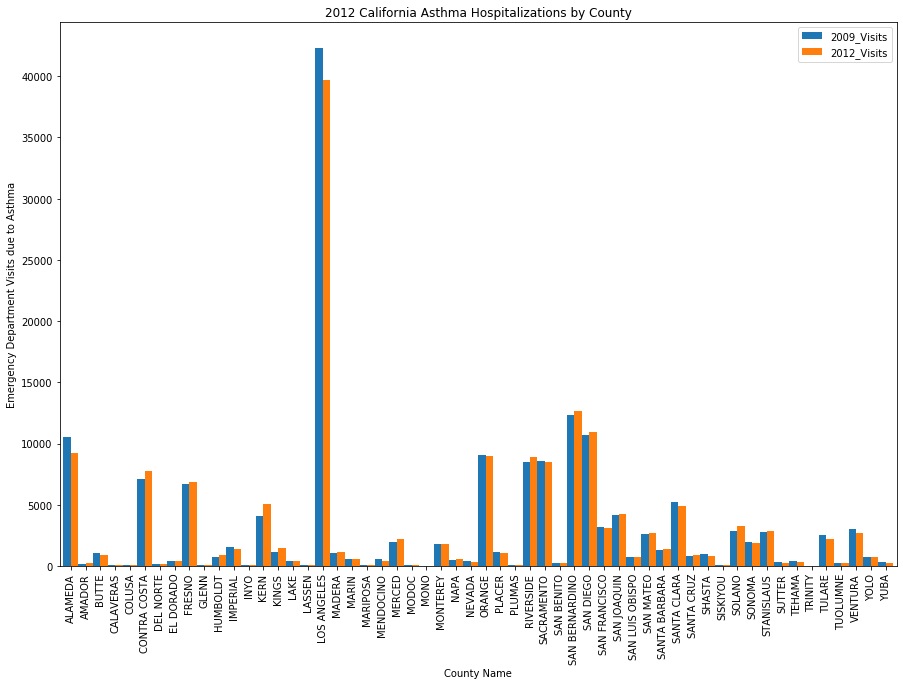

In [34]:
multi_plot = merged_numvisits_bycounty_2009_2012.plot(kind='bar', figsize=(15,10), width=1)
plt.title("2012 California Asthma Hospitalizations by County")
plt.xlabel("County Name")
plt.ylabel("Emergency Department Visits due to Asthma")

In [35]:
#Calculate % Change in Asthma-related Hospital Visits from 2009 to 2012
pc_change = (merged_numvisits_bycounty_2009_2012['2012_Visits'] - merged_numvisits_bycounty_2009_2012['2009_Visits'])*100 / merged_numvisits_bycounty_2009_2012['2009_Visits']
pc_change

County
ALAMEDA           -11.963453
AMADOR             89.705882
BUTTE             -12.260536
CALAVERAS          -0.952381
COLUSA             -9.333333
CONTRA COSTA        9.898190
DEL NORTE         -10.344828
EL DORADO           8.291457
FRESNO              1.820081
GLENN             -55.882353
HUMBOLDT           24.167873
IMPERIAL          -10.468140
INYO               -1.886792
KERN               24.128554
KINGS              21.984602
LAKE                2.925532
LASSEN            -19.801980
LOS ANGELES        -6.214235
MADERA              7.012488
MARIN               2.020202
MARIPOSA          -16.000000
MENDOCINO         -21.003717
MERCED             11.664954
MODOC              -2.631579
MONO              -20.000000
MONTEREY            3.176404
NAPA                4.255319
NEVADA            -15.690867
ORANGE             -0.607735
PLACER             -6.853021
PLUMAS            -27.956989
RIVERSIDE           4.528879
SACRAMENTO         -1.617972
SAN BENITO         -8.203125
SAN BER

In [36]:
#Append %Change to DataFrame
merged_numvisits_bycounty_2009_2012['%_Change'] = pc_change
merged_numvisits_bycounty_2009_2012

,2009_Visits,2012_Visits,%_Change
County,,,
ALAMEDA,10507.0,9250.0,-11.963453
AMADOR,136.0,258.0,89.705882
BUTTE,1044.0,916.0,-12.260536
CALAVERAS,105.0,104.0,-0.952381
COLUSA,75.0,68.0,-9.333333
CONTRA COSTA,7072.0,7772.0,9.898190
DEL NORTE,145.0,130.0,-10.344828
EL DORADO,398.0,431.0,8.291457
FRESNO,6703.0,6825.0,1.820081


In [42]:
#Top 10 largest %Decrease in Asthma-related Hospital Visits from 2009 to 2012
merged_numvisits_bycounty_2009_2012_sorted_asc = merged_numvisits_bycounty_2009_2012.sort_values(by=['%_Change'], ascending=False)
merged_numvisits_bycounty_2009_2012_sorted_asc.head(10)

,2009_Visits,2012_Visits,%_Change
County,,,
AMADOR,136.0,258.0,89.705882
TRINITY,18.0,33.0,83.333333
HUMBOLDT,691.0,858.0,24.167873
KERN,4045.0,5021.0,24.128554
KINGS,1169.0,1426.0,21.984602
SOLANO,2865.0,3270.0,14.136126
MERCED,1946.0,2173.0,11.664954
SANTA BARBARA,1291.0,1423.0,10.224632
CONTRA COSTA,7072.0,7772.0,9.898190


In [43]:
#Top 10 largest %Increase in Asthma-related Hospital Visits from 2009 to 2012
merged_numvisits_bycounty_2009_2012_sorted_desc = merged_numvisits_bycounty_2009_2012.sort_values(by=['%_Change'], ascending=True)
merged_numvisits_bycounty_2009_2012_sorted_desc.head(10)

,2009_Visits,2012_Visits,%_Change
County,,,
GLENN,102.0,45.0,-55.882353
YUBA,355.0,254.0,-28.450704
PLUMAS,93.0,67.0,-27.956989
SUTTER,328.0,239.0,-27.134146
TEHAMA,426.0,320.0,-24.882629
MENDOCINO,538.0,425.0,-21.003717
MONO,25.0,20.0,-20.000000
LASSEN,101.0,81.0,-19.801980
MARIPOSA,50.0,42.0,-16.000000


In [57]:
# Show Heatmap of 2009 Hospitalizations due to Asthma using GoogleMaps API
# The original data set had all the Latitudes and Longitudes before Grouping By County
# Also, I had to convert the Latitutes and Longitudes from Object Type to Float Type for it to work
locations = ca_asthma_data_final_2009allages[['Lat', 'Lng']]
weights = ca_asthma_data_final_2009allages['NumVisits']
fig1 = gmaps.figure()
fig1.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig1

Figure(layout=FigureLayout(height='420px'))

In [58]:
# Show Heatmap of 2012 Hospitalizations due to Asthma using GoogleMaps API.  (Not much difference)
# The original data set had all the Latitudes and Longitudes before Grouping By County
# I had to convert the Latitutes and Longitudes from Object Type to Float Type for it to work
locations = ca_asthma_data_final_2012allages[['Lat', 'Lng']]
weights = ca_asthma_data_final_2012allages['NumVisits']
fig2 = gmaps.figure()
fig2.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig2

Figure(layout=FigureLayout(height='420px'))

In [63]:
AllAges_2009_2012_ZipCodes = pd.merge(ca_asthma_data_final_2009allages, ca_asthma_data_final_2012allages, on='Zip_Code')
AllAges_2009_2012_ZipCodes

,Year_x,Age_Group_x,NumVisits_x,Age_adjusted_rate_x,countyfips_x,County_x,Zip_Code,Lat_x,Lng_x,Year_y,Age_Group_y,NumVisits_y,Age_adjusted_rate_y,countyfips_y,County_y,Lat_y,Lng_y
0,2009,All Ages,409.0,71.865807,6037,LOS ANGELES,90001,33.973274,-118.248970,2012,AllAges,433.0,76.2,6037,LOS ANGELES,33.973272,-118.248970
1,2009,All Ages,418.0,83.309461,6037,LOS ANGELES,90002,33.948951,-118.246980,2012,AllAges,438.0,78.2,6037,LOS ANGELES,33.948953,-118.246980
2,2009,All Ages,771.0,113.412107,6037,LOS ANGELES,90003,33.963350,-118.273936,2012,AllAges,559.0,80.7,6037,LOS ANGELES,33.963352,-118.273936
3,2009,All Ages,290.0,42.868175,6037,LOS ANGELES,90004,34.075721,-118.303017,2012,AllAges,365.0,63.2,6037,LOS ANGELES,34.075722,-118.303017
4,2009,All Ages,145.0,34.279585,6037,LOS ANGELES,90005,34.059071,-118.303017,2012,AllAges,132.0,36.9,6037,LOS ANGELES,34.059072,-118.303017
5,2009,All Ages,318.0,50.092309,6037,LOS ANGELES,90006,34.050102,-118.292689,2012,AllAges,269.0,46.6,6037,LOS ANGELES,34.050104,-118.292689
6,2009,All Ages,193.0,48.794808,6037,LOS ANGELES,90007,34.028334,-118.285077,2012,AllAges,210.0,73.3,6037,LOS ANGELES,34.028331,-118.285077
7,2009,All Ages,376.0,118.847864,6037,LOS ANGELES,90008,34.010971,-118.341588,2012,AllAges,338.0,111.1,6037,LOS ANGELES,34.010973,-118.341588
8,2009,All Ages,678.0,63.051258,6037,LOS ANGELES,90011,34.007904,-118.259037,2012,AllAges,583.0,54.9,6037,LOS ANGELES,34.007901,-118.259037
9,2009,All Ages,65.0,19.719563,6037,LOS ANGELES,90012,34.059483,-118.242048,2012,AllAges,71.0,26.0,6037,LOS ANGELES,34.059481,-118.242048


In [65]:
AllAges_2009_2012_ZipCodes['Difference'] = AllAges_2009_2012_ZipCodes['NumVisits_y']-AllAges_2009_2012_ZipCodes['NumVisits_x']
AllAges_2009_2012_ZipCodes

,Year_x,Age_Group_x,NumVisits_x,Age_adjusted_rate_x,countyfips_x,County_x,Zip_Code,Lat_x,Lng_x,Year_y,Age_Group_y,NumVisits_y,Age_adjusted_rate_y,countyfips_y,County_y,Lat_y,Lng_y,Difference
0,2009,All Ages,409.0,71.865807,6037,LOS ANGELES,90001,33.973274,-118.248970,2012,AllAges,433.0,76.2,6037,LOS ANGELES,33.973272,-118.248970,24.0
1,2009,All Ages,418.0,83.309461,6037,LOS ANGELES,90002,33.948951,-118.246980,2012,AllAges,438.0,78.2,6037,LOS ANGELES,33.948953,-118.246980,20.0
2,2009,All Ages,771.0,113.412107,6037,LOS ANGELES,90003,33.963350,-118.273936,2012,AllAges,559.0,80.7,6037,LOS ANGELES,33.963352,-118.273936,-212.0
3,2009,All Ages,290.0,42.868175,6037,LOS ANGELES,90004,34.075721,-118.303017,2012,AllAges,365.0,63.2,6037,LOS ANGELES,34.075722,-118.303017,75.0
4,2009,All Ages,145.0,34.279585,6037,LOS ANGELES,90005,34.059071,-118.303017,2012,AllAges,132.0,36.9,6037,LOS ANGELES,34.059072,-118.303017,-13.0
5,2009,All Ages,318.0,50.092309,6037,LOS ANGELES,90006,34.050102,-118.292689,2012,AllAges,269.0,46.6,6037,LOS ANGELES,34.050104,-118.292689,-49.0
6,2009,All Ages,193.0,48.794808,6037,LOS ANGELES,90007,34.028334,-118.285077,2012,AllAges,210.0,73.3,6037,LOS ANGELES,34.028331,-118.285077,17.0
7,2009,All Ages,376.0,118.847864,6037,LOS ANGELES,90008,34.010971,-118.341588,2012,AllAges,338.0,111.1,6037,LOS ANGELES,34.010973,-118.341588,-38.0
8,2009,All Ages,678.0,63.051258,6037,LOS ANGELES,90011,34.007904,-118.259037,2012,AllAges,583.0,54.9,6037,LOS ANGELES,34.007901,-118.259037,-95.0
9,2009,All Ages,65.0,19.719563,6037,LOS ANGELES,90012,34.059483,-118.242048,2012,AllAges,71.0,26.0,6037,LOS ANGELES,34.059481,-118.242048,6.0


In [83]:
# Show Heatmap of 2009 to 2012 differences (Normalized) in Hospitalizations due to Asthma using GoogleMaps API
# I had to Normalize the weights, because Google Maps wouldn't let me use a negative number for the weights
# So I had to add the absolute value of the minimum number (-212.0) to every data point and divide by the spread between Max and Min
# See the instructions: https://datascience.stackexchange.com/questions/5885/how-to-scale-an-array-of-signed-integers-to-range-from-0-to-1
difference = AllAges_2009_2012_ZipCodes['Difference']
min = AllAges_2009_2012_ZipCodes['Difference'].min()
max = AllAges_2009_2012_ZipCodes['Difference'].max()
print(min, max)

-212.0 287.0


In [84]:
spread = AllAges_2009_2012_ZipCodes['Difference'].max() - AllAges_2009_2012_ZipCodes['Difference'].min()
spread

499.0

In [85]:
AllAges_2009_2012_ZipCodes['Normalized'] = (AllAges_2009_2012_ZipCodes['Difference']+abs(AllAges_2009_2012_ZipCodes['Difference'].min()))/spread
AllAges_2009_2012_ZipCodes

,Year_x,Age_Group_x,NumVisits_x,Age_adjusted_rate_x,countyfips_x,County_x,Zip_Code,Lat_x,Lng_x,Year_y,Age_Group_y,NumVisits_y,Age_adjusted_rate_y,countyfips_y,County_y,Lat_y,Lng_y,Difference,Normalized
0,2009,All Ages,409.0,71.865807,6037,LOS ANGELES,90001,33.973274,-118.248970,2012,AllAges,433.0,76.2,6037,LOS ANGELES,33.973272,-118.248970,24.0,0.472946
1,2009,All Ages,418.0,83.309461,6037,LOS ANGELES,90002,33.948951,-118.246980,2012,AllAges,438.0,78.2,6037,LOS ANGELES,33.948953,-118.246980,20.0,0.464930
2,2009,All Ages,771.0,113.412107,6037,LOS ANGELES,90003,33.963350,-118.273936,2012,AllAges,559.0,80.7,6037,LOS ANGELES,33.963352,-118.273936,-212.0,0.000000
3,2009,All Ages,290.0,42.868175,6037,LOS ANGELES,90004,34.075721,-118.303017,2012,AllAges,365.0,63.2,6037,LOS ANGELES,34.075722,-118.303017,75.0,0.575150
4,2009,All Ages,145.0,34.279585,6037,LOS ANGELES,90005,34.059071,-118.303017,2012,AllAges,132.0,36.9,6037,LOS ANGELES,34.059072,-118.303017,-13.0,0.398798
5,2009,All Ages,318.0,50.092309,6037,LOS ANGELES,90006,34.050102,-118.292689,2012,AllAges,269.0,46.6,6037,LOS ANGELES,34.050104,-118.292689,-49.0,0.326653
6,2009,All Ages,193.0,48.794808,6037,LOS ANGELES,90007,34.028334,-118.285077,2012,AllAges,210.0,73.3,6037,LOS ANGELES,34.028331,-118.285077,17.0,0.458918
7,2009,All Ages,376.0,118.847864,6037,LOS ANGELES,90008,34.010971,-118.341588,2012,AllAges,338.0,111.1,6037,LOS ANGELES,34.010973,-118.341588,-38.0,0.348697
8,2009,All Ages,678.0,63.051258,6037,LOS ANGELES,90011,34.007904,-118.259037,2012,AllAges,583.0,54.9,6037,LOS ANGELES,34.007901,-118.259037,-95.0,0.234469
9,2009,All Ages,65.0,19.719563,6037,LOS ANGELES,90012,34.059483,-118.242048,2012,AllAges,71.0,26.0,6037,LOS ANGELES,34.059481,-118.242048,6.0,0.436874


In [86]:
# Heatmap shows the difference between 2009 to 2012.  Not sure exactly how to read this map
# Had to use the locations from 2012 data set only.
locations = AllAges_2009_2012_ZipCodes[['Lat_y', 'Lng_y']]
weights = AllAges_2009_2012_ZipCodes['Normalized']
fig3 = gmaps.figure()
fig3.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig3

Figure(layout=FigureLayout(height='420px'))